# Valuation Concepts

---

# Dividend Discount Models (DDM)

> __Dividend Discount Models (DDM) are valuation methods used to estimate the intrinsic value of a stock by focusing on its future dividend payments. The basic idea behind DDM is that the value of a stock is the present value of all its future dividend payments. Investors use DDM to assess whether a stock is overvalued, undervalued, or fairly valued.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from yahooquery import Ticker 
plt.style.use("seaborn-v0_8")

In [2]:
symbol = "AAPL"

In [3]:
tickeryf = yf.Ticker(symbol) # yfinance

In [4]:
tickeryq = Ticker(symbol) # yahooquery

In [5]:
n = 5

In [6]:
# Get last 5 years Dividend patments 
# Give me the mean() Dividend patments for each year mul(4) (4 qarter = year.)
dividends = tickeryf.actions.Dividends.resample("Y").mean().mul(4).tail(n)
dividends

Date
2019-12-31 00:00:00-05:00    0.760
2020-12-31 00:00:00-05:00    0.646
2021-12-31 00:00:00-05:00    0.865
2022-12-31 00:00:00-05:00    0.910
2023-12-31 00:00:00-05:00    0.950
Freq: A-DEC, Name: Dividends, dtype: float64

__Gordon Growth Model (GGM)__

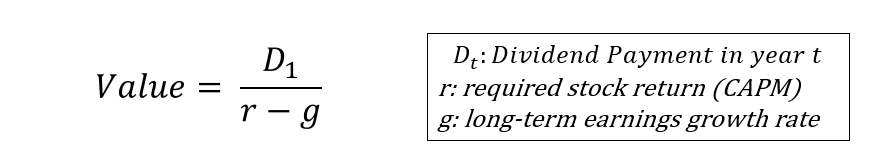

__D1__

In [7]:
# extract the last dividend payment
d0 = dividends[-1]
d0

C:\Users\97250\AppData\Local\Temp\ipykernel_8620\2937777404.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d0 = dividends[-1]


0.95

In [8]:
# Compute: average dividend growth rate n years

# For calculate the dividents growth rate, we do this:
# (most recent dividend / most fewer dividend)** 1/years - 1 
past_growth = (dividends[-1] / dividends[0])**(1/(n-1)) - 1

# This is the avarage dividends growth rate in the last 5 years. 
# 0.057 -> its growth in 5.7% over the last 5 years... 
past_growth

C:\Users\97250\AppData\Local\Temp\ipykernel_8620\3840648913.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  past_growth = (dividends[-1] / dividends[0])**(1/(n-1)) - 1


0.05737126344056409

In [9]:
# next dividend (forecast)
# forcast the NEXT dividend payment, we can calculate this:

# most recent dividend * 1 + growth rate  
d1 =  d0 * (1 + past_growth)
d1

# E.g 
# most recent dividend: 0.95
# dividend growth rate: 0.057
# The next dividend (forcast):
# 0.95 * (1 + 0.057) = 1.004149

1.0045027002685358

__g__

In [10]:
past_growth

0.05737126344056409

In [11]:
# Take lot's of statistics reperts for AAPL stock :)
info = tickeryq.key_stats[symbol]
info

{'maxAge': 1,
 'priceHint': 2,
 'enterpriseValue': 2936523456512,
 'forwardPE': 25.810057,
 'profitMargins': 0.25305998,
 'floatShares': 15535177390,
 'sharesOutstanding': 15552799744,
 'sharesShort': 98190963,
 'sharesShortPriorMonth': 94725628,
 'sharesShortPreviousMonthDate': '2023-09-29 03:00:00',
 'dateShortInterest': '2023-10-31 02:00:00',
 'sharesPercentSharesOut': 0.0063,
 'heldPercentInsiders': 0.00071999995,
 'heldPercentInstitutions': 0.61317,
 'shortRatio': 1.84,
 'shortPercentOfFloat': 0.0063,
 'beta': 1.305,
 'impliedSharesOutstanding': 15552799744,
 'category': None,
 'bookValue': 3.997,
 'priceToBook': 46.234676,
 'fundFamily': None,
 'legalType': None,
 'lastFiscalYearEnd': '2023-09-30 03:00:00',
 'nextFiscalYearEnd': '2024-09-30 03:00:00',
 'mostRecentQuarter': '2023-09-30 03:00:00',
 'earningsQuarterlyGrowth': 0.108,
 'netIncomeToCommon': 96995000320,
 'trailingEps': 6.14,
 'forwardEps': 7.16,
 'pegRatio': 4.63,
 'lastSplitFactor': '4:1',
 'lastSplitDate': '2020-08-3

In [12]:
# long-term earnings growth (forecast)
ear_growth = (info["forwardPE"] /info["pegRatio"]) / 100
ear_growth

0.05574526349892009

__r (CAPM)__

In [13]:
# beta
beta = info["beta"]
beta

1.305

In [14]:
# risk-free return
rfr = yf.download(tickers = "^IRX").Close.dropna().iloc[-1] / 100 #13 Week US Treasury Bill
rfr

[*********************100%%**********************]  1 of 1 completed


0.05259999752044678

https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html

In [15]:
url = "https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html"

In [16]:
import pandas as pd
import requests
from io import StringIO

url = "https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html"

# Make an HTTP GET request with SSL verification turned off
response = requests.get(url, verify=False)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Read the HTML content into a DataFrame
    df = pd.read_html(StringIO(response.text), header=[0], index_col=[0])[0]
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

c:\Users\97250\Desktop\sample_project_1\env\Lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pages.stern.nyu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [17]:
df

,Moody's rating,Default Spread,Country Risk Premium,Equity Risk Premium,Corporate Tax Rate
Country,,,,,
Abu Dhabi,Aa2,0.53%,0.75%,5.75%,15.00%
Albania,B1,4.82%,6.83%,11.83%,15.00%
Algeria,NR,3.85%,5.46%,10.46%,26.00%
Andorra (Principality of),Baa2,2.04%,2.89%,7.89%,18.98%
Angola,B3,6.95%,9.86%,14.86%,25.00%
...,...,...,...,...,...
Venezuela,C,17.50%,24.82%,29.82%,34.00%
Vietnam,Ba2,3.22%,4.57%,9.57%,20.00%
"Yemen, Republic",NR,10.70%,15.18%,20.18%,20.00%


$\text{Risk Premium=Expected Return on Investment−Risk-Free Rate}$

In [18]:
# expected market risk premium
# take the Equity Risk  Premium of United States. 
# / 100 -> for get precents
erp = float(df.loc["United States", "Equity Risk  Premium"].split("%")[0]) / 100
erp

# 0.05 -> 5% expected market risk premuim

0.05

In [19]:
# expected return (CAPM)
# risk free rate + market risk premium * beta of the instrument= expected return
exp_ret = rfr + (erp) * beta
exp_ret

# 0.1178 -> expected return from AAPL of 11.7%

0.11784999752044678

After we calculate the **`D`, `g`, `r`**,

__Calculate the fair value__ (Gordon Growth Model (GGM))

In [20]:
# Calculate the fair value of one share.
value = d1 / (exp_ret - ear_growth)
value

16.174333826473774

In [21]:
value = d1 / (exp_ret - past_growth)
value

16.60918859415525

In [22]:
current_price = tickeryq.price[symbol]["regularMarketPrice"] # yahooquery
current_price

184.8

__-> AAPL overvalued? Not necessarily. DDMs are very input-sensitive (to be analyzed in more detail)__

---

# DDM - verification of results & critical review

> __By calculating the implied growth or the implied return, we are in a position to verify the current price and either justify the current price or challenge the current price.__

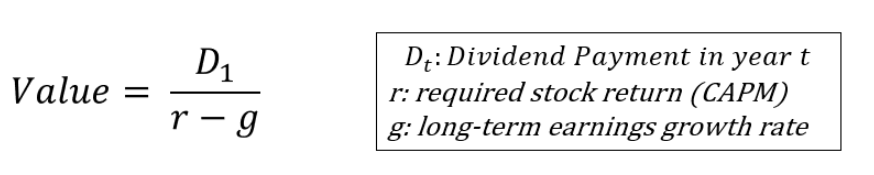

__Two possible reasons why DDMs unterestimate true Value: (among others)__ 

__1) assumed long-term growth rate is understated__ 

> We could replace the value by the current price and then resolve the formula here for the implied growth rate.

In [23]:
# implied growth rate
# Expected growth =
# = expected return of AAPL - most recent Dividnd paymat of AAPL / current price of AAPL 
impl_growth = exp_ret - d1 / current_price
impl_growth

# This is the expected growth

0.11241437684799799

__2) assumed required return is overstated__

In [24]:
# implied required return
impl_return = d1 / current_price + ear_growth
impl_return

0.061180884171368875

__three potential reasons why r (srock return based of CAPM) is overstated__

[*********************100%%**********************]  1 of 1 completed


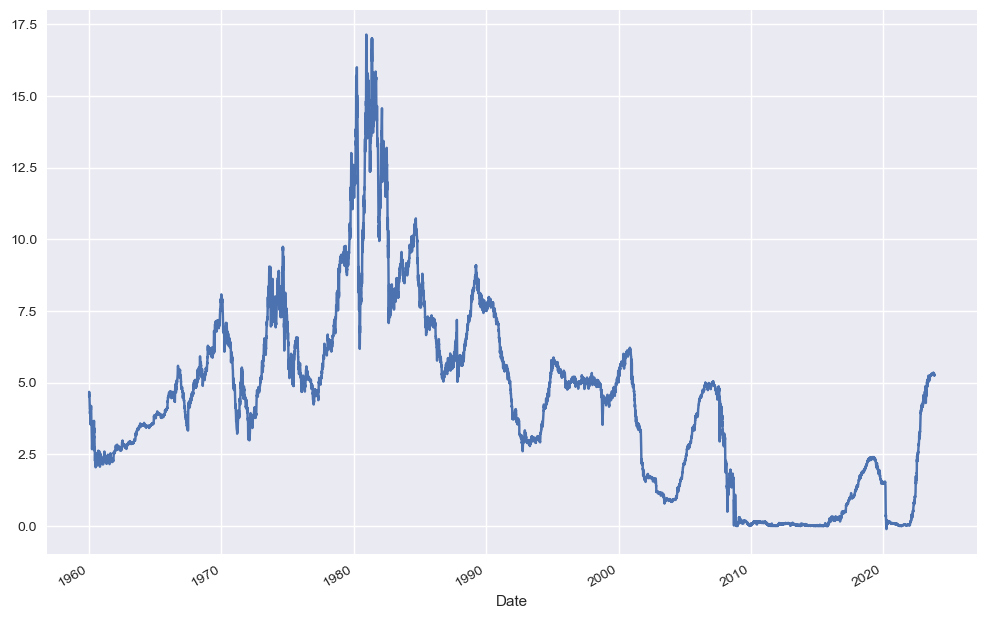

In [25]:
# 1. rfr is too high
yf.download(tickers = "^IRX").Close.plot(figsize = (12, 8))
plt.show()

__rfr currently above long-term rate (energy crisis, inflation) -> overstated__

In [26]:
rfr = 0.02

__Adjusting beta for beta drift (beta tend to move back to 1 acc. to Blume)__

In [27]:
# 2. beta is overstated -> use adjusted beta
adj_beta = beta * 0.67 + 1 * 0.33
adj_beta

1.20435

In [28]:
# 3. expected market risk premium is too high
erp = 0.055

In [29]:
# expected return (CAPM)
exp_ret = rfr + (erp) * adj_beta
exp_ret

0.08623925

In [30]:
impl_return

0.061180884171368875

In [31]:
impl_growth = exp_ret - d1 / current_price
impl_growth

0.08080362932755122

In [32]:
# Now re compute the fair value
# more realistic!
value = d1 / (exp_ret - impl_growth)
value

184.80000000000027

In [33]:
current_price

184.8

__DDM - final Considerations:__
- not exact science
- highly sensitive to `r (expexted return based on CAPM)` and `g (growth rate)`
- can be used to critically verify/justify/challenge current price (implied growth/return)
- can´t be used for companies with no history of dividend payments
- can´t be used for companies with no clear dividend payout strategy
- meaningful only if dividends are related to earnings.
- should be used in combination with other valuation methods

---

# Price Multiples - Overview and Calculation

> __With price multiples and multiples valuation and actually price multiples are among the most widely used tools for equity valuation because the computation is pretty simple and the data requirements are rather low and multiples valuation is based on the law of one price.__

- Price Multiples are among the __most widely used__ tools for equity valuation
- Law of one Price -> Two __similar stocks__ should sell at __comparable price multiples__ (e.g. price-to-book)
- Valuation relative to a __peer group__

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from yahooquery import Ticker
plt.style.use("seaborn-v0_8")

In [35]:
symbol = "MSFT"

In [36]:
tickeryq = Ticker(symbol) # yahooquery

__Current Price (fairly valued?)__

In [37]:
current_price = tickeryq.price[symbol]["regularMarketPrice"] # yahooquery
current_price

366.68

__Price-to-Earnings Ratio (P/E)__

- Current Price divided by Earnings per Share
- Earnings Power (generating profits) is the primary determinant of investment value
- very popular
- meaningless if Earnings are negative
- Earnings are volatile
- Earnings can be manipulated by the management (discretion within allowed accounting practices)
- trailing P/E (past Earnings) vs. leading P/E (Earnings forecast)

__trailingPE (Trailing Price-to-Earnings Ratio):__
> __represents the ratio of a company's current stock price to its earnings per share (EPS) over the past 12 months.__

> __It's a valuation metric that helps investors assess how the market values a company's past earnings performance.__

$ \text{Forward PE} = \frac{\text{Current Stock Price}}{\text{Earnings per Share over the Last 12 Months}}$

In [38]:
# Get the Price-to-Earnings Ratio (P/E)
trailingPE = tickeryq.summary_detail[symbol]["trailingPE"] # yahooquery
trailingPE

35.6

__forwardPE (Forward Price-to-Earnings Ratio):__

> __is similar to trailing PE, but it uses estimated future earnings instead of past earnings.__

> __It provides a valuation based on expected future earnings rather than historical performance.__

$ \text{Forward PE} = \frac{\text{Current Stock Price}}{\text{Estimated Future Earnings per Share}}$

In [39]:
forwardPE = tickeryq.key_stats[symbol]["forwardPE"] # yahooquery
forwardPE

28.33694

__Earnings Calculation:__

> is calculated based on the forward PE ratio. It represents the estimated earnings for each share, given the current stock price and the forward PE ratio.

In [40]:
earnings = current_price / forwardPE # underlying financial factor
earnings

12.93999987295735

In [41]:
tickeryq.key_stats[symbol]["forwardEps"] # yahooquery

12.94

- __Higher P/E justified with higher Earnings growth!__
- __P/E-to-growth ratio (PEG) takes into account growth as well!__

In [42]:
peg = tickeryq.key_stats[symbol]["pegRatio"] #yahooquery
peg

2.03

> __the PEG ratio (Price/Earnings to Growth ratio) is a valuation metric that takes into account both the company's earnings growth and its price-to-earnings (P/E) ratio__

- This calculation provides a simplified measure of how the stock's valuation compares to its expected earnings growth. __A PEG ratio around 1__ is often considered indicative of fair value, with __values below 1__ suggesting potentially undervalued stocks and __values above 1__ suggesting potentially overvalued stocks. However, like any financial metric, it's important to interpret the PEG ratio in the context of other factors and industry benchmarks.

In [43]:
growth = forwardPE / peg # 10.2% implied earnings growth rate
growth

13.959083743842365

__Price-to-Book Ratio (P/B)__

- Current Price divided by Book Value of Equity (per share)
- Typically positive -> can be used even when the Earnings are negative
- BV more stable than Earnings
- BV does not reflect intangible assets, outsourcing, etc. 

In [44]:
pricetobook = tickeryq.key_stats[symbol]["priceToBook"] # yahooquery
pricetobook

12.345297

> __this is the current price divided by total sales or total revenue is per share.__

In [45]:
# underlying financial factor
book = current_price / pricetobook 
book

29.70199906895719

In [46]:
tickeryq.key_stats[symbol]["bookValue"] # yahooquery

29.702

__Price-to-Sales Ratio (P/S)__

- Current Price divided by Sales/Revenue (per share)
- meaningful even if Earnings and Book Value are close to zero or negative
- Sales not as volatile as earnings
- does not capture differences in cost structure and financing structure (debt/equity)

In [47]:
sales = tickeryq.financial_data[symbol]["revenuePerShare"]  # yahooquery
sales

29.347

In [48]:
pricetosales = current_price / tickeryq.financial_data[symbol]["revenuePerShare"] # yahooquery
pricetosales

12.494633182267352

__Price-to-Cashflow__

- Current Price divided by Operating Cashflow (per share)
- Cashflows less volatile than Earnings
- Cashflows less dependent on accounting policies
- meaningless if Cashflows are negative

In [49]:
cashflow = tickeryq.financial_data[symbol]["operatingCashflow"] / tickeryq.key_stats[symbol]["sharesOutstanding"] # yahooquery
cashflow

12.777674054102425

In [50]:
pricetocashflow = current_price / cashflow # multiple
pricetocashflow

28.6969285996361

__Dividend Yield__

- Last (annual) Dividend divided by Current Price
- only applicable for dividend paying stocks
- Direct benefit to Shareholders

In [51]:
dividendyield = tickeryq.summary_detail[symbol]["dividendYield"] #yahooquery
dividendyield

0.0082

In [52]:
div = dividendyield * current_price
div

3.0067760000000003

- There is no perfect/best price Multiple
- There are pros and cons for all Multiples
- Multiples should be used and analyzed together

---

# Peer Group / Comparables

- Law of one Price -> Two __similar stocks__ should sell at __comparable price multiples__ (e.g. price-to-book)
- This requires an appropriate __peer group__ (5-50 comparable companies)

In [53]:
listings = pd.read_csv("nasdaq_listings.csv", index_col = "Symbol")
listings

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
Symbol,,,,,,,,,,
A,Agilent Technologies Inc. Common Stock,$156.86,11.7200,8.08%,4.643692e+10,United States,1999.0,3512521,Industrials,Electrical Products
AA,Alcoa Corporation Common Stock,$49.36,2.7300,5.86%,8.733618e+09,NaN,2016.0,5592225,Industrials,Metal Fabrications
AAC,Ares Acquisition Corporation Class A Ordinary ...,$10.005,0.0050,0.05%,1.250625e+09,NaN,2021.0,11399,Finance,Business Services
AACG,ATA Creativity Global American Depositary Shares,$1.68,-0.0200,-1.18%,5.271323e+07,China,2008.0,601,Consumer Discretionary,Service to the Health Industry
AACI,Armada Acquisition Corp. I Common Stock,$9.985,0.0150,0.15%,2.067844e+08,United States,2021.0,83731,Industrials,Consumer Electronics/Appliances
...,...,...,...,...,...,...,...,...,...,...
ZWRKW,Z-Work Acquisition Corp. Warrant,$0.0005,-0.0006,-54.55%,0.000000e+00,United States,2021.0,2014,Industrials,Consumer Electronics/Appliances
ZWS,Zurn Elkay Water Solutions Corporation Common ...,$24.86,1.0000,4.19%,4.419974e+09,United States,2012.0,1257952,Utilities,Environmental Services
ZYME,Zymeworks Inc. Common Shares,$7.76,-0.1900,-2.39%,4.787484e+08,Canada,2022.0,632987,Health Care,Biotechnology: Biological Products (No Diagnos...


In [54]:
listings.loc[listings.Name.str.contains("Microsoft")]

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
Symbol,,,,,,,,,,
MSFT,Microsoft Corporation Common Stock,$245.03,2.98,1.23%,1.826570e+12,United States,1986.0,19653979,Technology,Computer Software: Prepackaged Software


What´s an appropriate Peer Group for MSFT?

__Same Industry (Computer Software)__

In [55]:
# Find the Peer Group of microsoft by masks

# Computer Software companies
mask1 = listings.Industry == "Computer Software: Prepackaged Software"
mask1

Symbol
A        False
AA       False
AAC      False
AACG     False
AACI     False
         ...  
ZWRKW    False
ZWS      False
ZYME     False
ZYNE     False
ZYXI     False
Name: Industry, Length: 8290, dtype: bool

__Same Country (US)__

In [56]:
# only from USE
mask2 = (listings.Country == "United States") 
mask2

Symbol
A         True
AA       False
AAC      False
AACG     False
AACI      True
         ...  
ZWRKW     True
ZWS       True
ZYME     False
ZYNE      True
ZYXI      True
Name: Country, Length: 8290, dtype: bool

__Similar Size (large Cap)__

In [57]:
# big companies
mask3 = listings["Market Cap"] > 10000000000 # more than 10 billion
mask3

Symbol
A         True
AA       False
AAC      False
AACG     False
AACI     False
         ...  
ZWRKW    False
ZWS      False
ZYME     False
ZYNE     False
ZYXI     False
Name: Market Cap, Length: 8290, dtype: bool

In [58]:
# Apply the masks for reach the peer group os microsoft
peerg = listings.loc[mask1 & mask2 & mask3]

# Here's the companies that most like microsoft:
peerg

,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
Symbol,,,,,,,,,,
ADBE,Adobe Inc. Common Stock,$330.88,9.39,2.92%,1.538260e+11,United States,1986.0,2572817,Technology,Computer Software: Prepackaged Software
ADSK,Autodesk Inc. Common Stock,$208.90,2.40,1.16%,4.509296e+10,United States,NaN,2491024,Technology,Computer Software: Prepackaged Software
ANSS,ANSYS Inc. Common Stock,$244.03,2.75,1.14%,2.125800e+10,United States,1996.0,278949,Technology,Computer Software: Prepackaged Software
CDNS,Cadence Design Systems Inc. Common Stock,$165.20,3.34,2.06%,4.531700e+10,United States,NaN,1118381,Technology,Computer Software: Prepackaged Software
CRM,Salesforce Inc. Common Stock,$149.25,4.40,3.04%,1.492500e+11,United States,2004.0,7014815,Technology,Computer Software: Prepackaged Software
FICO,Fair Isaac Corproation Common Stock,$577.90,-3.59,-0.62%,1.443341e+10,United States,NaN,174968,Technology,Computer Software: Prepackaged Software
GEN,Gen Digital Inc. Common Stock,$23.11,0.06,0.26%,2.408470e+11,United States,NaN,5092454,Technology,Computer Software: Prepackaged Software
HUBS,HubSpot Inc. Common Stock,$272.58,8.74,3.31%,1.324090e+10,United States,2014.0,645430,Technology,Computer Software: Prepackaged Software
INTU,Intuit Inc. Common Stock,$392.23,17.23,4.60%,1.105580e+11,United States,1993.0,2298040,Technology,Computer Software: Prepackaged Software


In [59]:
peerg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, ADBE to ZM
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        24 non-null     object 
 1   Last Sale   24 non-null     object 
 2   Net Change  24 non-null     float64
 3   % Change    24 non-null     object 
 4   Market Cap  24 non-null     float64
 5   Country     24 non-null     object 
 6   IPO Year    17 non-null     float64
 7   Volume      24 non-null     int64  
 8   Sector      24 non-null     object 
 9   Industry    24 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ KB


In [60]:
symbols = peerg.index.to_list()
symbols

['ADBE',
 'ADSK',
 'ANSS',
 'CDNS',
 'CRM',
 'FICO',
 'GEN',
 'HUBS',
 'INTU',
 'MSFT',
 'NOW',
 'ORCL',
 'PCTY',
 'PTC',
 'SE',
 'SNOW',
 'SPLK',
 'SQ',
 'TTWO',
 'TYL',
 'VMW',
 'WDAY',
 'ZI',
 'ZM']

In [61]:
df = peerg[["Name"]].copy()
df

,Name
Symbol,
ADBE,Adobe Inc. Common Stock
ADSK,Autodesk Inc. Common Stock
ANSS,ANSYS Inc. Common Stock
CDNS,Cadence Design Systems Inc. Common Stock
CRM,Salesforce Inc. Common Stock
FICO,Fair Isaac Corproation Common Stock
GEN,Gen Digital Inc. Common Stock
HUBS,HubSpot Inc. Common Stock
INTU,Intuit Inc. Common Stock


__Get the multiples for all the peer groups comanies!__

- Its all what we did before.. 
    - `forwardPE` -> ratio of Price / Erning  
    - `pegRatio` -> PEG ratio (ratio of Price/Earnings to Growth ratio) 
    - `priceToBook` -> ratio of Price / book ratio
    - `PS` -> ratio of Price / Sells 
    - `PC` -> ratio of Price / chashflow
    - `DY` -> Dividends yield

In [63]:
count = 0
for symbol in symbols:
    count += 1
    print(count, end = '\r')
    try:
        # get the ticker
        ticker = Ticker(symbol)
    except:
        print("Ticker {} not found.".format(ticker))
        continue
    try:

        df.loc[symbol, "PE"] = ticker.key_stats[symbol]["forwardPE"]
    except:
        pass
    try:
        df.loc[symbol, "PEG"] = ticker.key_stats[symbol]["pegRatio"]
    except: 
        pass
    try:
        df.loc[symbol, "PB"] = ticker.key_stats[symbol]["priceToBook"]
    except:
        pass
    try:
        df.loc[symbol, "PS"] = ticker.price[symbol]["regularMarketPrice"] / ticker.financial_data[symbol]["revenuePerShare"]
    except:
        pass
    try:    
        df.loc[symbol, "PC"] = ticker.price[symbol]["regularMarketPrice"] / (ticker.financial_data[symbol]["operatingCashflow"] / ticker.key_stats[symbol]["sharesOutstanding"])
    except:
        pass
    try:  
        df.loc[symbol, "DY"] = ticker.summary_detail[symbol]["dividendYield"]
    except:
        pass

In [64]:
df

# Show the multiples: 

,Name,PE,PEG,PB,PS,PC,DY
Symbol,,,,,,,
ADBE,Adobe Inc. Common Stock,32.833150,2.54,17.063824,14.361407,33.472204,0.0115
ADSK,Autodesk Inc. Common Stock,24.775946,1.89,37.278210,8.646802,20.067835,0.0196
ANSS,ANSYS Inc. Common Stock,30.599370,3.20,5.047089,11.708377,38.397724,0.1290
CDNS,Cadence Design Systems Inc. Common Stock,44.964226,2.58,23.059584,18.142700,53.559318,0.0043
CRM,Salesforce Inc. Common Stock,22.926517,1.01,3.613839,6.402189,24.936600,0.0673
FICO,Fair Isaac Corproation Common Stock,35.972637,2.39,NaN,16.710744,53.350470,0.0006
GEN,Gen Digital Inc. Common Stock,8.325991,0.80,5.018587,3.214832,12.344051,0.0265
HUBS,HubSpot Inc. Common Stock,65.216020,1.77,18.237232,10.381868,64.550320,NaN
INTU,Intuit Inc. Common Stock,28.565756,2.20,8.641810,10.407964,29.557716,0.0068


----

# Multiples Valuation

> __So far we orgenize the peer group of microsoft (all the biggest computer softer in USA like microsoft) and we calculate all the multiples. Now we can compare the multiples across all the companies!__

In [65]:
pd.options.display.float_format = '{:.2f}'.format

In [72]:
df
# Remind our self about the df of all the companies and their multiples:

,Name,PE,PEG,PB,PS,PC,DY
Symbol,,,,,,,
ADBE,Adobe Inc. Common Stock,32.83,2.54,17.06,14.36,33.47,0.01
ADSK,Autodesk Inc. Common Stock,24.78,1.89,37.28,8.65,20.07,0.02
ANSS,ANSYS Inc. Common Stock,30.60,3.20,5.05,11.71,38.40,0.13
CDNS,Cadence Design Systems Inc. Common Stock,44.96,2.58,23.06,18.14,53.56,0.00
CRM,Salesforce Inc. Common Stock,22.93,1.01,3.61,6.40,24.94,0.07
FICO,Fair Isaac Corproation Common Stock,35.97,2.39,NaN,16.71,53.35,0.00
GEN,Gen Digital Inc. Common Stock,8.33,0.80,5.02,3.21,12.34,0.03
HUBS,HubSpot Inc. Common Stock,65.22,1.77,18.24,10.38,64.55,NaN
INTU,Intuit Inc. Common Stock,28.57,2.20,8.64,10.41,29.56,0.01


__Calculate "Average" Peer Group Multiples (Median!)__

In [67]:
# Let's find the company (exclude microsoft,
# becase we calculate the valuation for Microsoft in the cell below.)
# in the median (we calculate median),
# and see this company multiples! 

pm = df.drop(labels = ["MSFT"]
).median(numeric_only = True)
pm

PE    28.57
PEG    1.89
PB     8.64
PS     8.59
PC    29.56
DY     0.01
dtype: float64

In [68]:
# calculate the valuation for Microsoft.
# the earnings, growth, book, cashflow - is all microsoft parameters.
# we calculate those microsoft parameter with the
# multiples of the median company (avarage company)

valuation = np.array([pm.PE * earnings, pm.PEG * growth * earnings,
                      pm.PB * book, pm.PS * sales, pm.PC * cashflow, div / pm.DY])
valuation

# So for each multiple, we get one fair value estimate for Microsoft.

# Now you can compare those values to microsoft values, and compare. 

array([369.64087901, 341.39172414, 256.67903257, 251.96684989,
       377.67886123, 203.16054054])

In [69]:
valuation = pd.Series(index = pm.index, data = valuation)
valuation

PE    369.64
PEG   341.39
PB    256.68
PS    251.97
PC    377.68
DY    203.16
dtype: float64

In [70]:
current_price

366.68

In [71]:
valuation.mean()

300.08631456376577

- MSFT´s Multiples Value is close to the Price
- Is MSFT over-/ undervalued? 
- If semi-strong EMH holds: No (Price Multiples are publicly available information)
- There might be factors justifying a Price Premium/Discount (latest news, qualitative factors)
- Price Multiples should be used together and in combination with other valuation/analysis tools.